In [67]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk

%matplotlib inline


In [68]:
datasets = pd.read_csv("/home/shrestha/mPercept/Natural Language Processing/Sentiment Analysis/IMDB reviews/imdb_reviews.csv", delimiter = '\t', quoting = 3, header = None)

                       

In [69]:
datasets.columns = ['reviews', 'Likes']


In [70]:
datasets

,reviews,Likes
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
5,"The rest of the movie lacks art, charm, meanin...",0
6,Wasted two hours.,0
7,Saw the movie today and thought it was a good ...,1
8,A bit predictable.,0
9,Loved the casting of Jimmy Buffet as the scien...,1


In [71]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [6]:
ps = PorterStemmer() #object initialization for stemmer
word_net_lemmatizer = WordNetLemmatizer() #object initilization for lemmatizer

In [7]:
corpus = [] #Initializing empty list

In [8]:
#Cleaning the text with stemmer
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', datasets['reviews'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [ps.stem(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
#Cleaning the text with lemmatizer
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', datasets['reviews'][i])
    review = review.lower()
    review = review.split()
    review = [word for word in review if not word in set(stopwords.words('english'))]
    review = [word_net_lemmatizer.lemmatize(word) for word in review]
    review = ' '.join(review)
    corpus.append(review)

In [9]:
corpus

['slow move aimless movi distress drift young man',
 'sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema',
 'think fil

In [10]:
df = pd.DataFrame({'Review':corpus}) #creating a dataframe with column name as review 

In [11]:
df


,Review
0,slow move aimless movi distress drift young man
1,sure lost flat charact audienc nearli half walk
2,attempt arti black white clever camera angl mo...
3,littl music anyth speak
4,best scene movi gerardo tri find song keep run...
5,rest movi lack art charm mean empti work guess...
6,wast two hour
7,saw movi today thought good effort good messag...
8,bit predict
9,love cast jimmi buffet scienc teacher


In [12]:
from sklearn.feature_extraction.text import CountVectorizer


In [13]:
cv = CountVectorizer(max_features = 2300)
fit_corpus = cv.fit(corpus)
print(cv.get_feature_names())

['aailiyah', 'abandon', 'abil', 'abroad', 'absolut', 'abstrus', 'abysm', 'academi', 'accent', 'access', 'acclaim', 'accolad', 'accur', 'accus', 'achiev', 'achil', 'ackerman', 'act', 'action', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'addit', 'admin', 'admir', 'admit', 'ador', 'adrift', 'adventur', 'advis', 'aerial', 'aesthet', 'affect', 'affleck', 'afraid', 'africa', 'afternoon', 'age', 'ago', 'agre', 'aimless', 'air', 'akasha', 'akin', 'alert', 'alexand', 'alik', 'allison', 'allow', 'almost', 'along', 'alongsid', 'alreadi', 'also', 'although', 'alway', 'amateurish', 'amaz', 'amazingli', 'america', 'american', 'among', 'amount', 'amus', 'anatomist', 'angel', 'angela', 'angelina', 'angl', 'angri', 'angu', 'anguish', 'anim', 'anita', 'ann', 'anniversari', 'annoy', 'anoth', 'anthoni', 'antithesi', 'anyon', 'anyth', 'anyway', 'apart', 'appal', 'appeal', 'appear', 'applaud', 'applaus', 'appreci', 'appropri', 'apt', 'argu', 'armageddon', 'armand', 'around', 'array', 'art',

In [14]:
transform_corpus = cv.transform(corpus) #X = cv.fit_transform(corpus).toarray()

In [15]:
transform_corpus_toarray = transform_corpus.toarray()

In [16]:
print(transform_corpus_toarray)
print(transform_corpus_toarray.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(1000, 2300)


In [17]:
X = transform_corpus_toarray

In [18]:
X.shape

(1000, 2300)

In [19]:
y = datasets.iloc[:, 1].values


In [20]:
print(y)

[0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 1 1 0 0 1 1 1 

In [21]:
from sklearn.cross_validation import train_test_split

/home/shrestha/anaconda3/envs/abhiyush/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [75]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB


In [24]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [76]:
classifier = MultinomialNB(alpha = 0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

In [77]:
y_pred = classifier.predict(X_test)

In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
cm = confusion_matrix(y_test, y_pred)

In [109]:
cm

array([[69, 17],
       [27, 87]])

In [29]:
accuracy = (71+64)/200 *100
print("The accuracy of the Gaussian naive bayes model using stemmer is : ", accuracy)

The accuracy of the model is :  67.5


In [81]:
accuracy = (69+87)/200 *100
print("The accuracy of the model Multinomial naive bayes using stemmer is : ", accuracy)

The accuracy of the model Multinomial naive bayes using stemmer is :  78.0


In [82]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0])

In [107]:
from sklearn.metrics import roc_auc_score, roc_curve


In [108]:
score = roc_auc_score(y_test, y_pred)
score

0.7827417380660954

In [87]:
#Spitting the datasets into train and test sets 
a_train, a_test, b_train, b_test = train_test_split(datasets['reviews'][:], datasets['Likes'][:], test_size = 0.20, random_state = 0)

training_sets = pd.DataFrame({'Training_review':a_train})
test_sets = pd.DataFrame({'Test_review' : a_test})

training_sets['Trainig_likes'] = b_train
test_sets['Test_likes'] = b_test

test_sets['Test_likes_predicted'] = y_pred

y_pred_chr = []

for i in range(0,200):
    if y_pred[i] == 0:
        y_pred_chr.append('Bad')
    else:
        y_pred_chr.append('Good')
    

y_pred_chr = pd.DataFrame(y_pred_chr)
test_sets['test_likes_predicted_chr'] = y_pred_chr


In [86]:
test_sets

,Test_review,Test_likes,Test_likes_predicted,test_likes_predicted_chr
993,It looked like a wonderful story.,1,1,NaN
859,"The best scene in the movie is at the end, but...",1,1,NaN
298,I have to mention this and it is a huge SPOILE...,1,1,NaN
553,This movie is a solid example of a bad plot an...,0,0,NaN
672,"It felt like a very gripping, intelligent stag...",1,0,NaN
971,The art style has the appearance of crayon/pen...,1,1,NaN
27,This is the number one best TH game in the ser...,1,1,Bad
231,"I mean, in a realistic world, she would NEVER ...",0,0,NaN
306,In a most wonderful location lies a story of c...,1,1,NaN
706,The show would begin with smart ass ed comment...,0,0,NaN


# Tf-idf 

In [88]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [89]:
tfidf_vectorizer = TfidfVectorizer().fit(corpus)

In [90]:
print(tfidf_vectorizer.get_feature_names())

['aailiyah', 'abandon', 'abil', 'abroad', 'absolut', 'abstrus', 'abysm', 'academi', 'accent', 'access', 'acclaim', 'accolad', 'accur', 'accus', 'achiev', 'achil', 'ackerman', 'act', 'action', 'actor', 'actress', 'actual', 'ad', 'adam', 'adapt', 'add', 'addit', 'admin', 'admir', 'admit', 'ador', 'adrift', 'adventur', 'advis', 'aerial', 'aesthet', 'affect', 'affleck', 'afraid', 'africa', 'afternoon', 'age', 'ago', 'agre', 'aimless', 'air', 'akasha', 'akin', 'alert', 'alexand', 'alik', 'allison', 'allow', 'almost', 'along', 'alongsid', 'alreadi', 'also', 'although', 'alway', 'amateurish', 'amaz', 'amazingli', 'america', 'american', 'among', 'amount', 'amus', 'anatomist', 'angel', 'angela', 'angelina', 'angl', 'angri', 'angu', 'anguish', 'anim', 'anita', 'ann', 'anniversari', 'annoy', 'anoth', 'anthoni', 'antithesi', 'anyon', 'anyth', 'anyway', 'apart', 'appal', 'appeal', 'appear', 'applaud', 'applaus', 'appreci', 'appropri', 'apt', 'argu', 'armageddon', 'armand', 'around', 'array', 'art',

In [91]:
tfidf_vectorizer_transform = tfidf_vectorizer.transform(a_test)

In [92]:
print(tfidf_vectorizer_transform.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [93]:
pd.DataFrame(tfidf_vectorizer_transform.toarray(), columns = tfidf_vectorizer.get_feature_names())

,aailiyah,abandon,abil,abroad,absolut,abstrus,abysm,academi,accent,access,...,yelp,yet,young,younger,youth,youtub,yun,zillion,zombi,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.298995,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Visualization 

In [94]:
from nltk import FreqDist
from collections import Counter


In [96]:
corpus

['slow move aimless movi distress drift young man',
 'sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost non exist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head',
 'rest movi lack art charm mean empti work guess empti',
 'wast two hour',
 'saw movi today thought good effort good messag kid',
 'bit predict',
 'love cast jimmi buffet scienc teacher',
 'babi owl ador',
 'movi show lot florida best made look appeal',
 'song best muppet hilari',
 'cool',
 'right case movi deliv everyth almost right face',
 'averag act main person low budget clearli see',
 'review long overdu sinc consid tale two sister singl greatest film ever made',
 'put gem movi term screenplay cinematographi act post product edit direct aspect film make',
 'practic perfect true masterpiec sea faux masterpiec',
 'structur film easili tightli construct histori cinema',
 'think fil

In [97]:
#joining each term of the corpus
corpus_combine = ' '.join(corpus)

In [98]:
type(corpus_combine)

str

In [101]:
# simple tokenization
words = corpus_combine.split()
print(words)
frequency_map = Counter(words)

# for scatter plot
indices_max = 200 # max number of points to plot
Y = list(frequency_map.values())[:indices_max]
X = list(range(len(Y)))
words_plot = list(frequency_map.keys())[:indices_max]

['slow', 'move', 'aimless', 'movi', 'distress', 'drift', 'young', 'man', 'sure', 'lost', 'flat', 'charact', 'audienc', 'nearli', 'half', 'walk', 'attempt', 'arti', 'black', 'white', 'clever', 'camera', 'angl', 'movi', 'disappoint', 'becam', 'even', 'ridicul', 'act', 'poor', 'plot', 'line', 'almost', 'non', 'exist', 'littl', 'music', 'anyth', 'speak', 'best', 'scene', 'movi', 'gerardo', 'tri', 'find', 'song', 'keep', 'run', 'head', 'rest', 'movi', 'lack', 'art', 'charm', 'mean', 'empti', 'work', 'guess', 'empti', 'wast', 'two', 'hour', 'saw', 'movi', 'today', 'thought', 'good', 'effort', 'good', 'messag', 'kid', 'bit', 'predict', 'love', 'cast', 'jimmi', 'buffet', 'scienc', 'teacher', 'babi', 'owl', 'ador', 'movi', 'show', 'lot', 'florida', 'best', 'made', 'look', 'appeal', 'song', 'best', 'muppet', 'hilari', 'cool', 'right', 'case', 'movi', 'deliv', 'everyth', 'almost', 'right', 'face', 'averag', 'act', 'main', 'person', 'low', 'budget', 'clearli', 'see', 'review', 'long', 'overdu', 's

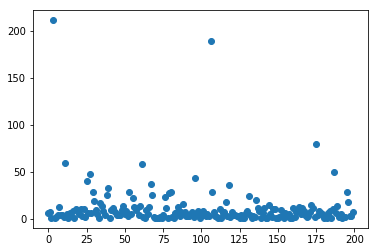

In [102]:
plt.scatter(X,Y)

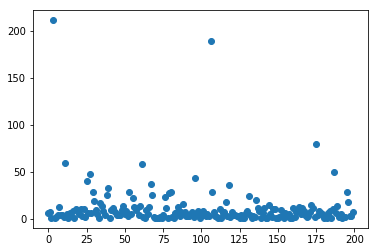

In [103]:
fig, ax = plt.subplots()
ax.scatter(X, Y)


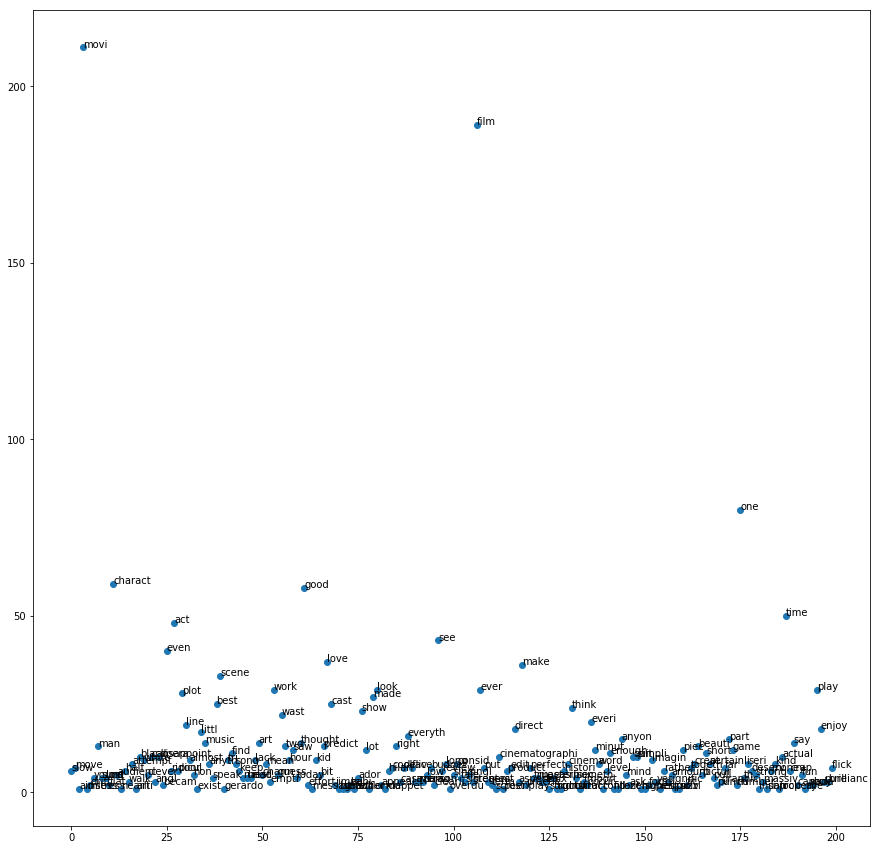

In [104]:
# scatter plot with labelled point
fig, ax = plt.subplots(figsize = (15,15))
ax.scatter(X, Y)

for i, txt in enumerate(words_plot):
    ax.annotate(txt, (X[i],Y[i]))

0


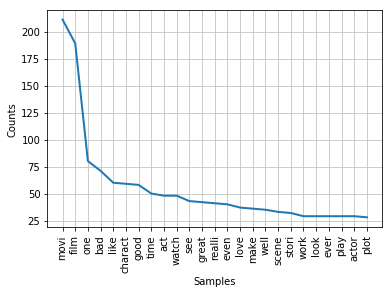

In [105]:
# nltk tokenizer and frequency map# nltk  
tokens = nltk.word_tokenize(corpus_combine)
#print(tokens)
freq = FreqDist(tokens)
print(freq['i'])
freq.plot(25, cumulative=False)

# Splitting a datasets into traing and test sets 

In [106]:
a_train, a_test, b_train, b_test = train_test_split(datasets['reviews'][:], datasets['Likes'][:], test_size = 0.20, random_state = 0)

In [33]:
a_train

687                                10 out of 10 stars.  
500    The entire audience applauded at the conclusio...
332          To call this movie a drama is ridiculous!  
979         It is a very well acted and done TV Movie.  
817    You will leave the theater wanting to go out a...
620    This is a masterful piece of film-making, with...
814    You share General Loewenhielm's exquisite joy ...
516    I could not understand, what kind of idiot wou...
518    The casting is also horrible, cause all you se...
940    The story is also both funny and poignant at t...
113    ), and sometimes it was so embarrassing that I...
612    The characters are interesting and you want to...
37                 Buy it, play it, enjoy it, love it.  
894    The story is lame, not interesting and NEVER r...
895    There aren't death scenes like in previous mov...
992                  Lange had become a great actress.  
158                           I hate movies like that.  
154                            

In [34]:
training_sets = pd.DataFrame({'Training_review':a_train})
test_sets = pd.DataFrame({'Test_review' : a_test})

In [35]:
training_sets['Trainig_likes'] = b_train
test_sets['Test_likes'] = b_test

In [36]:
training_sets.shape

(800, 2)

In [37]:
test_sets.shape

(200, 2)

In [54]:
type(b_test)

pandas.core.series.Series

In [38]:
test_sets

,Test_review,Test_likes
993,It looked like a wonderful story.,1
859,"The best scene in the movie is at the end, but...",1
298,I have to mention this and it is a huge SPOILE...,1
553,This movie is a solid example of a bad plot an...,0
672,"It felt like a very gripping, intelligent stag...",1
971,The art style has the appearance of crayon/pen...,1
27,This is the number one best TH game in the ser...,1
231,"I mean, in a realistic world, she would NEVER ...",0
306,In a most wonderful location lies a story of c...,1
706,The show would begin with smart ass ed comment...,0


In [39]:
test_sets['Test_likes_predicted'] = y_pred

In [40]:
test_sets

,Test_review,Test_likes,Test_likes_predicted
993,It looked like a wonderful story.,1,0
859,"The best scene in the movie is at the end, but...",1,0
298,I have to mention this and it is a huge SPOILE...,1,1
553,This movie is a solid example of a bad plot an...,0,0
672,"It felt like a very gripping, intelligent stag...",1,0
971,The art style has the appearance of crayon/pen...,1,1
27,This is the number one best TH game in the ser...,1,0
231,"I mean, in a realistic world, she would NEVER ...",0,0
306,In a most wonderful location lies a story of c...,1,1
706,The show would begin with smart ass ed comment...,0,0


In [59]:
y_pred_chr = []

In [60]:
for i in range(0,200):
    if y_pred[i] == 0:
        y_pred_chr.append('Bad')
    else:
        y_pred_chr.append('Good')
    

In [61]:
y_pred_chr.shape

AttributeError: 'list' object has no attribute 'shape'

In [62]:
y_pred_chr = pd.DataFrame(y_pred_chr)

In [63]:
y_pred_chr

,0
0,Bad
1,Bad
2,Good
3,Bad
4,Bad
5,Good
6,Bad
7,Bad
8,Good
9,Bad


In [64]:
test_sets['test_likes_predicted_chr'] = y_pred_chr

In [66]:
test_sets

,Test_review,Test_likes,Test_likes_predicted,test_likes_predicted_chr
993,It looked like a wonderful story.,1,0,NaN
859,"The best scene in the movie is at the end, but...",1,0,NaN
298,I have to mention this and it is a huge SPOILE...,1,1,NaN
553,This movie is a solid example of a bad plot an...,0,0,NaN
672,"It felt like a very gripping, intelligent stag...",1,0,NaN
971,The art style has the appearance of crayon/pen...,1,1,NaN
27,This is the number one best TH game in the ser...,1,0,Bad
231,"I mean, in a realistic world, she would NEVER ...",0,0,NaN
306,In a most wonderful location lies a story of c...,1,1,NaN
706,The show would begin with smart ass ed comment...,0,0,NaN
